Ячейка 1. Импорт и загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)

# Грузим «чистый» DF
df = pd.read_csv("../data/processed/df_clean.csv")
# Убеждаемся, что таргет есть
df['readmit_bin'] = (df['readmitted'] == '<30').astype(int)

Ячейка 2. Формируем X и y, делим на train/test

In [2]:
# Выбираем числовые признаки + age_num, без категорий (потом добавим)
features = [
    'time_in_hospital', 'age_num', 'num_lab_procedures', 
    'num_procedures', 'num_medications', 'number_outpatient',
    'number_emergency', 'number_inpatient', 'number_diagnoses'
]
X = df[features]
y = df['readmit_bin']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Positive rate (train):", y_train.mean().round(3),
      " (test):", y_test.mean().round(3))

Train size: (71236, 9) Test size: (30530, 9)
Positive rate (train): 0.112  (test): 0.112


Ячейка 3. Исходные данные: Логистическая регрессия

              precision    recall  f1-score   support

    No (<30)       0.91      0.71      0.80     27123
   Yes (<30)       0.17      0.48      0.25      3407

    accuracy                           0.68     30530
   macro avg       0.54      0.59      0.52     30530
weighted avg       0.83      0.68      0.74     30530

ROC AUC: 0.637


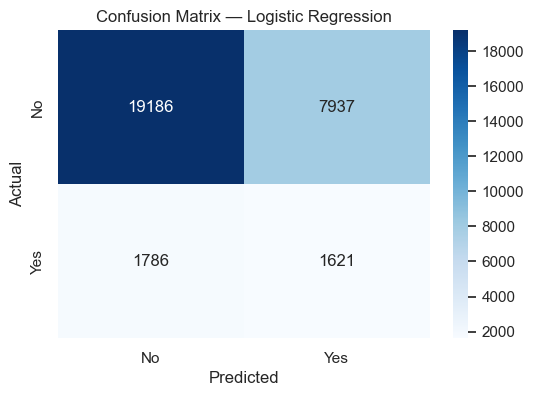

In [4]:
# Инициализируем модель с балансировкой классов
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Отчет по классам
print(classification_report(y_test, y_pred, target_names=['No (<30)', 'Yes (<30)']))

# Правильный расчёт ROC AUC
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix -Logistic Regression")
plt.show()

## Stage 3: Baseline Logistic Regression - Результаты и выводы

### Метрики качества

- **Accuracy**: 0.68  
- **ROC AUC**: 0.637  

| Класс        | Precision | Recall | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| No (<30)     | 0.91      | 0.71   | 0.80     | 27 123  |
| Yes (<30)    | 0.17      | 0.48   | 0.25     | 3 407   |
| **Macro avg**  | 0.54      | 0.59   | 0.52     | 30 530  |
| **Weighted avg** | 0.83      | 0.68   | 0.74     | 30 530  |

### Confusion Matrix




- **True Negatives (No→No)**: 19 186  
- **False Positives (No→Yes)**: 7 937  
- **False Negatives (Yes→No)**: 1 786  
- **True Positives (Yes→Yes)**: 1 621  

---

### Выводы

1. **Хорошее Precision для «No (<30)»**: модель надёжно распознаёт тех, кто не возвращается в 30 дней.  
2. **Низкое Precision для «Yes (<30)» (0.17)**: среди предсказанных «<30» много ложных срабатываний.  
3. **Средний Recall для «Yes (<30)» (0.48)**: модель находит лишь половину пациентов с ре-госпитализацией <30 дней.  
4. **ROC AUC = 0.637**: есть пространство для улучшения, но уже выше случайного уровня (0.5).

---

### Что можно улучшить

- **Добавить категориальные признаки** (раса, пол, тип приёма и др.) с кодированием.  
- **Использовать другие алгоритмы**: RandomForest, XGBoost, нейронные сети.  
- **Настроить порог** принятия решения (threshold) для повышения Precision или Recall в зависимости от приоритетов.  
- **Балансировка выборки**: SMOTE или undersampling для повышения качества класса «Yes (<30)».  

Следующий шаг расширить набор признаков и протестировать более сложные модели в `4_advanced_models.ipynb`.  
